First Steps: creating the dataframes and inspecting them

In [2]:
import pandas as pd

ratings = pd.read_csv("../data/ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
print(ratings.head())
print("\n")
print(ratings.describe())
print("\n")

# ===================================================================================================================================

movies = pd.read_csv("../data/ml-100k/u.item", sep="|", encoding="latin-1", names=["movie_id", "movie_title", "release_date", "video_release_date",
              "IMDb_URL", "unknown", "Action", "Adventure", "Animation",
              "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film_Noir", "Horror", "Musical", "Mystery", "Romance", "Sci_Fi",
              "Thriller", "War", "Western"])

movies = movies.drop(['video_release_date', 'IMDb_URL'], axis=1)

print(movies.head())
print("\n")

# ===================================================================================================================================

users = pd.read_csv("../data/ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])
print(users.head())
print(users.info())


   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


            user_id       movie_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


   movie_id        movie_title release_date  unknown  Action  Adventure  \
0         1   Toy Story (1995)  01-Jan-1995        0       0          0   
1         2   GoldenEye (1995)

Checking for the Movie Ratings Distribution

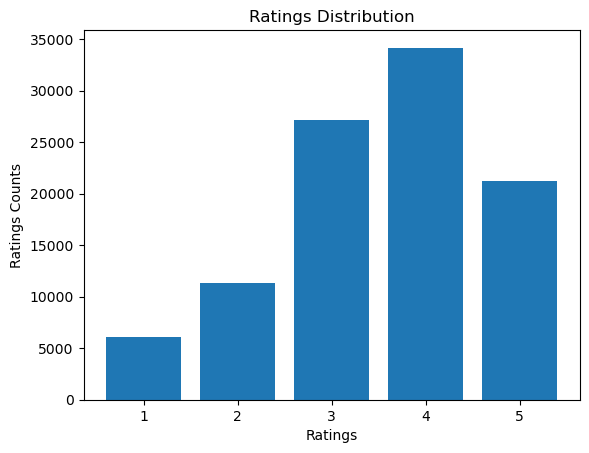

In [3]:
import matplotlib.pyplot as plt

rating_counts = ratings["rating"].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Ratings")
plt.ylabel("Ratings Counts")
plt.title("Ratings Distribution")
plt.show()

Discovering Top 10 Best Rated Movies

In [4]:
movie_stats = ratings.groupby("movie_id")["rating"].agg(["mean", "count"])

popular_movies = movie_stats[movie_stats["count"] >= 50]

popular_movies = popular_movies.merge(movies, on="movie_id")

top_movies = popular_movies.sort_values('mean', ascending=False)

print(top_movies[["movie_id", "movie_title", "mean", "count"]].head(10))


     movie_id                                        movie_title      mean  \
321       408                              Close Shave, A (1995)  4.491071   
273       318                            Schindler's List (1993)  4.466443   
140       169                         Wrong Trousers, The (1993)  4.466102   
376       483                                  Casablanca (1942)  4.456790   
91        114  Wallace & Gromit: The Best of Aardman Animatio...  4.447761   
51         64                   Shawshank Redemption, The (1994)  4.445230   
448       603                                 Rear Window (1954)  4.387560   
10         12                         Usual Suspects, The (1995)  4.385768   
38         50                                   Star Wars (1977)  4.358491   
149       178                                12 Angry Men (1957)  4.344000   

     count  
321    112  
273    298  
140    118  
376    243  
91      67  
51     283  
448    209  
10     267  
38     583  
149    125 

Creating a User x Movie Matrix, where the values are the ratings 

each row is an user, each column is a movie

In [5]:
df = pd.merge(ratings, movies, on="movie_id")

user_movie_matrix = df.pivot_table(index='user_id', columns='movie_title', values='rating')

user_movie_matrix_filled = user_movie_matrix.apply(lambda row: row.fillna(row.mean()), axis=1) # replacing NaN values with the user ratings mean

print(user_movie_matrix_filled.head())

movie_title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                       
1                             3.605166      3.605166               2.000000   
2                             3.704918      3.704918               3.704918   
3                             2.773585      2.773585               2.773585   
4                             4.333333      4.333333               4.333333   
5                             2.874286      2.874286               2.000000   

movie_title  12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                     
1                       5.000000    3.605166                     3.605166   
2                       3.704918    3.704918                     3.704918   
3                       2.773585    2.000000                     2.773585   
4                       4.333333    4.333333                 

Creating a User Similarity DataFrame, using cosine similarity: calculates the cosine between two vectors (two users), the closer to 1,  the more similar their movie tastes are

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_movie_matrix_filled)  # creates a similarity matrix

user_similarity_df = pd.DataFrame(user_similarity,                  # turning the matrix into a df
                                  index=user_movie_matrix_filled.index,
                                  columns=user_movie_matrix_filled.index)

print(user_similarity_df.head())

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.989116  0.987328  0.990088  0.981615  0.986645  0.983722   
2        0.989116  1.000000  0.995640  0.998256  0.987340  0.994018  0.990637   
3        0.987328  0.995640  1.000000  0.996573  0.985670  0.991779  0.988591   
4        0.990088  0.998256  0.996573  1.000000  0.988169  0.994470  0.991025   
5        0.981615  0.987340  0.985670  0.988169  1.000000  0.984000  0.981311   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.989893  0.989931  0.989142  ...  0.987007  0.989406  0.988325   
2        0.996909  0.998321  0.997773  ...  0.995112  0.997976  0.996026   
3        0.995332  0.996674  0.996026  ...  0.993495  0.996437  0.994171   
4        0.998036  0.999399  0.998622  ...  0.996201

Now, let's select our target user so we could predict some movies recommendatios for him, based on other users similar tastes.
The calculus is made by dividing the weighted sum of the neighbor rating multiplied by its similarity rate, by the sum of all the similarities rate

In [14]:
target_user = user_movie_matrix.loc[1]  # selecting our target user ratings, we're gonna predict movie recommendations for him
print(target_user)

print("\n")

target_similarity = user_similarity_df.loc[1].sort_values(ascending=False)  # selecting the top 100 similar users from our target user 
target_similarity = target_similarity.drop(1)
print(target_similarity.head(100))

print("\n")

nan_rated_movies = target_user[target_user.isna()].index  # selecting only the movies that our target user haven't seen yet
print(nan_rated_movies)


predictions = {}

for movies in nan_rated_movies:
    
    ratings_from_neighbors = []
    similarities = []
    
    for neighbor_id, similarity in  target_similarity.items():
        neighbor_rating = user_movie_matrix.loc[neighbor_id, movies]
    
        if pd.notna(neighbor_rating):
            ratings_from_neighbors.append(neighbor_rating)
            similarities.append(similarity)
    
    if ratings_from_neighbors:  # verifies if the list is not empty
        weighted_sum = sum(similarities[i] * ratings_from_neighbors[i] for i in range(len(ratings_from_neighbors)))
        sum_of_weights = sum(similarities)

        predicted_rating = weighted_sum / sum_of_weights

        predictions[movies] = predicted_rating

top_recommendations = pd.Series(predictions).sort_values(ascending = False)
print("=======================================================================================")
print("\n")
print("Movies recommended for you:")
print("\n")
print(top_recommendations.head(10))  # print the top recommendations for our target user based on neighbors ratings
print("\n")
print("=======================================================================================")


movie_title
'Til There Was You (1997)                NaN
1-900 (1994)                             NaN
101 Dalmatians (1996)                    2.0
12 Angry Men (1957)                      5.0
187 (1997)                               NaN
                                        ... 
Young Guns II (1990)                     NaN
Young Poisoner's Handbook, The (1995)    NaN
Zeus and Roxanne (1997)                  NaN
unknown                                  4.0
Á köldum klaka (Cold Fever) (1994)       NaN
Name: 1, Length: 1664, dtype: float64


user_id
225    0.990264
549    0.990260
691    0.990241
247    0.990228
594    0.990211
         ...   
469    0.989913
220    0.989910
512    0.989909
156    0.989909
17     0.989909
Name: 1, Length: 100, dtype: float64


Index([''Til There Was You (1997)', '1-900 (1994)', '187 (1997)',
       '2 Days in the Valley (1996)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       '8 1/2 (1963)', '8 Heads in a Duffel Bag 